# k Nearest Neighbors
## Classification
Реализуйте алгоритм к ближайших соседей. 
Создадим искуственный набор данных из 100 наблюдений с 3 классами.
Необходимо реализовать функцию на входе которой:
- тренировочный набор данных (признаки и метки классов);
- тестовый набор данных (признаки);
- $k$ - количество ближайших соседей.

На выходе функция должна возвращать метки тестового набора данных. 
В качестве расстояния между объектами следует использовать Эвклидову меру.

**Алгоритм к ближайших соседей:**

Для каждого объекта тестового набора данных:
1. вычисление расстояний между всеми объектами тренировочного набора;
2. определение $k$ наименьших расстояний;
3. определение классов для $k$ найденных объектов;
4. присваивание метки тестовому объекту класса, который превалирует среди найденных объектов.

В многоклассовой модели может возникнуть неопределенность, что в 3 найденных объектак будут присутсвовать разные классы. В этом случае необходимо присваивать класс случайным образом.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, Y = make_blobs(n_samples = 100, n_features=2, centers=3, cluster_std = 2, random_state=17)

Text(0.5, 1.0, 'Initial data')

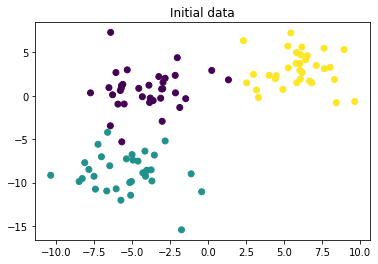

In [3]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.title('Initial data')

In [4]:
import math
import random
import numpy as np
from collections import Counter

In [5]:
def dist(x, x_train, y_train):
    dist=[]
    
    for i in range(len(x_train)):
        dist.append(((np.linalg.norm(x-x_train[i])), y_train[i]))
    return dist

In [6]:
# Разбитие данных на тестовую и обучающую выборку
def splitData(data, classes, percent):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    for i in range(100):
        if random.random() < percent:
            x_train.append(data[i])
            y_train.append(classes[i])
        else:
            x_test.append(data[i])
            y_test.append(classes[i])
    return x_train, x_test, y_train, y_test

#x_train, x_test, y_train, y_test = splitData(X, Y, 0.5)

In [64]:
def funct_kNN(x_train, y_train, x_test, k): #y_test -> x_test
    testDist = []
    y_t = []
    
    for x in x_test:
        testDist = (dist(x, x_train, y_train))
        testDist = sorted(testDist, key = lambda a: a[0])[:k]
        #print(testDist)        
        val = [i[1] for i in testDist]
        #print(val)
        cnt = Counter(val).most_common(3)
        if len(cnt) == 3:
            if cnt[0][1] == cnt[1][1] and cnt[1][1] == cnt[2][1]:
                k_nair = random.randint(0,2)
        else:
            k_nair = cnt[0][0]
        y_t.append(k_nair)
    
    return y_t

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)
#x_train, x_test, y_train, y_test = splitData(X, Y, 0.5)

for k in [1, 3, 5, 7, 9]:
    y = funct_kNN(x_train, y_train, x_test, k)
    #print(y)
    print('Accuracy k=' + str(k) + ' ' + str(accuracy_score(y_test, y)))

Accuracy k=1 0.98
Accuracy k=3 0.98
Accuracy k=5 0.98
Accuracy k=7 0.98
Accuracy k=9 0.98


Для корректного анализа построенного классификатора, разбейте исходный набор данных на тренировочный и тестовый.
Проверьте качество классификации для различных параметров $k$ (1, 3, 5, 7, 9) метрикой точность (Accuracy). Точность это отношение количества правильно классифицированных объектов ко всему количеству объектов.

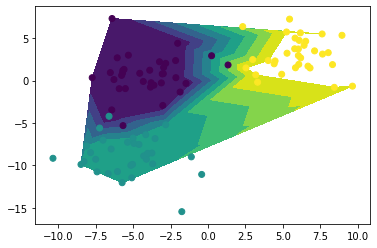

In [68]:
plt.tricontourf(x_test[:,0], x_test[:,1], y)
plt.scatter(X[:,0], X[:,1], c = Y)

Постройте разделающие поверхности, которые строит классификатор

## Regression
Напишите функцию для регрессии методом к ближайших соседей.

Для проверки вашего регрессионной модели создайте функцию синуса в диапазоне [0, 5] и возьмите в этом диапазоне 10 случайных точек как тренеровочную выборку. 
Задача: предсказать функцию на всем диапазоне [0, 5] для всех возможных значений параметра $k$.

$y = sin(x)$

**Алгоритм регрессии:**

Для каждого тестового обекта:
1. вычисление расстояний между всеми тренировочными объектами (можно использовать просто разницу по модулю между признаками объектов, так как у нас всего один признак в задаче);
2. нахождение $k$ объектов с минимальными расстояниями;
3. вычисление среднего значения по к найденным объектам и присваивание этого значения тестовому объекту.

In [69]:
def funct_kNN_reg(x_train, y_train, x_test, k):
    testDist = []
    y_test = []
    
    for x in x_test:
        testDist = (dist(x, x_train, y_train))
        testDist = sorted(testDist, key = lambda a: a[0])[:k]
        #print(testDist)
        val = [i[1] for i in testDist]
        y_test.append(np.mean(val))
    
    return y_test

In [83]:
from math import sin
from sklearn.metrics import mean_absolute_error

X = np.linspace(0.0, 5.0, num=20)
Y = [sin(i) for i in X]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_train, y_train, x_test, k)
    print('Error=' + str(mean_absolute_error(y_test, y_reg)) + ' for k=' + str(k))


Error=0.2772069701296697 for k=1
Error=0.27991603817324223 for k=3
Error=0.27734663156151923 for k=5
Error=0.36644830962251135 for k=7
Error=0.5091521325165258 for k=9


Постройте на одном графике исходную функцию, тренировочные объекты и предсказанные функции для каждого значения $k$.

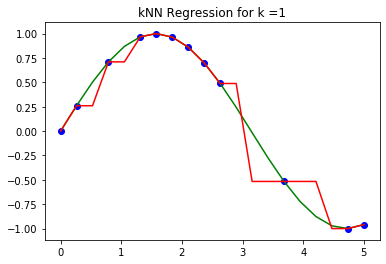

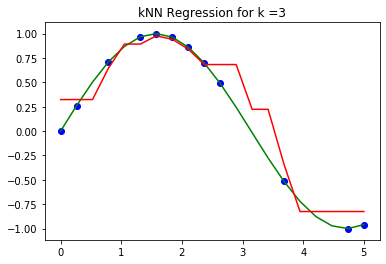

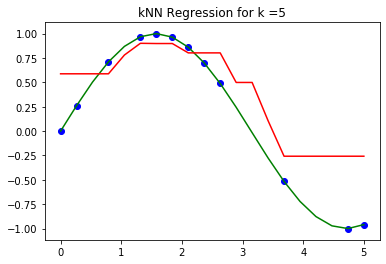

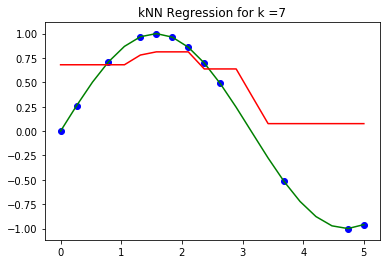

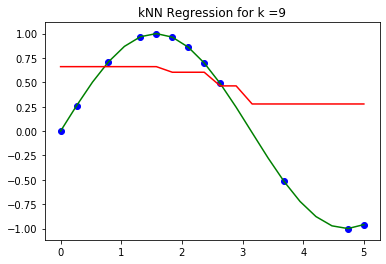

In [84]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
for k in [1, 3, 5, 7, 9]:
    y_reg = funct_kNN_reg(x_train, y_train, X, k)
    plt.scatter(x_train, y_train, c='blue')
    plt.plot(X, Y, c='green')
    plt.plot(X, y_reg, c='red')
    plt.title('kNN Regression for k =' + str(k))
    plt.show()